# Project Statistical ML - Logistic Regression


Begin by importing the necessary libraries


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
# import sklearn.discriminant_analysis as skl_da
# import sklearn.neighbors as skl_nb

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png')
from IPython.core.pylabtools import figsize

figsize(10, 6)  # Width and hight
# plt.style.use('seaborn-white')

Loading the data


In [67]:
df = pd.read_csv("train.csv", na_values="?", dtype={"ID": str}).dropna().reset_index()

### Familiarizing with the data


In [68]:
df.head()

,index,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


In [69]:
df.describe()

,index,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,519.000000,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044
std,300.077768,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696
min,0.000000,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000
25%,259.500000,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000
50%,519.000000,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000
75%,778.500000,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000
max,1038.000000,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000


In [70]:
print(df)

      index  Number words female  Total words  Number of words lead  \
0         0                 1512         6394                2251.0   
1         1                 1524         8780                2020.0   
2         2                  155         4176                 942.0   
3         3                 1073         9855                3440.0   
4         4                 1317         7688                3835.0   
...     ...                  ...          ...                   ...   
1034   1034                  303         2398                1334.0   
1035   1035                  632         8404                1952.0   
1036   1036                 1326         2750                 877.0   
1037   1037                  462         3994                 775.0   
1038   1038                 2735        11946                3410.0   

      Difference in words lead and co-lead  Number of male actors  Year  \
0                                      343                      2  1995 

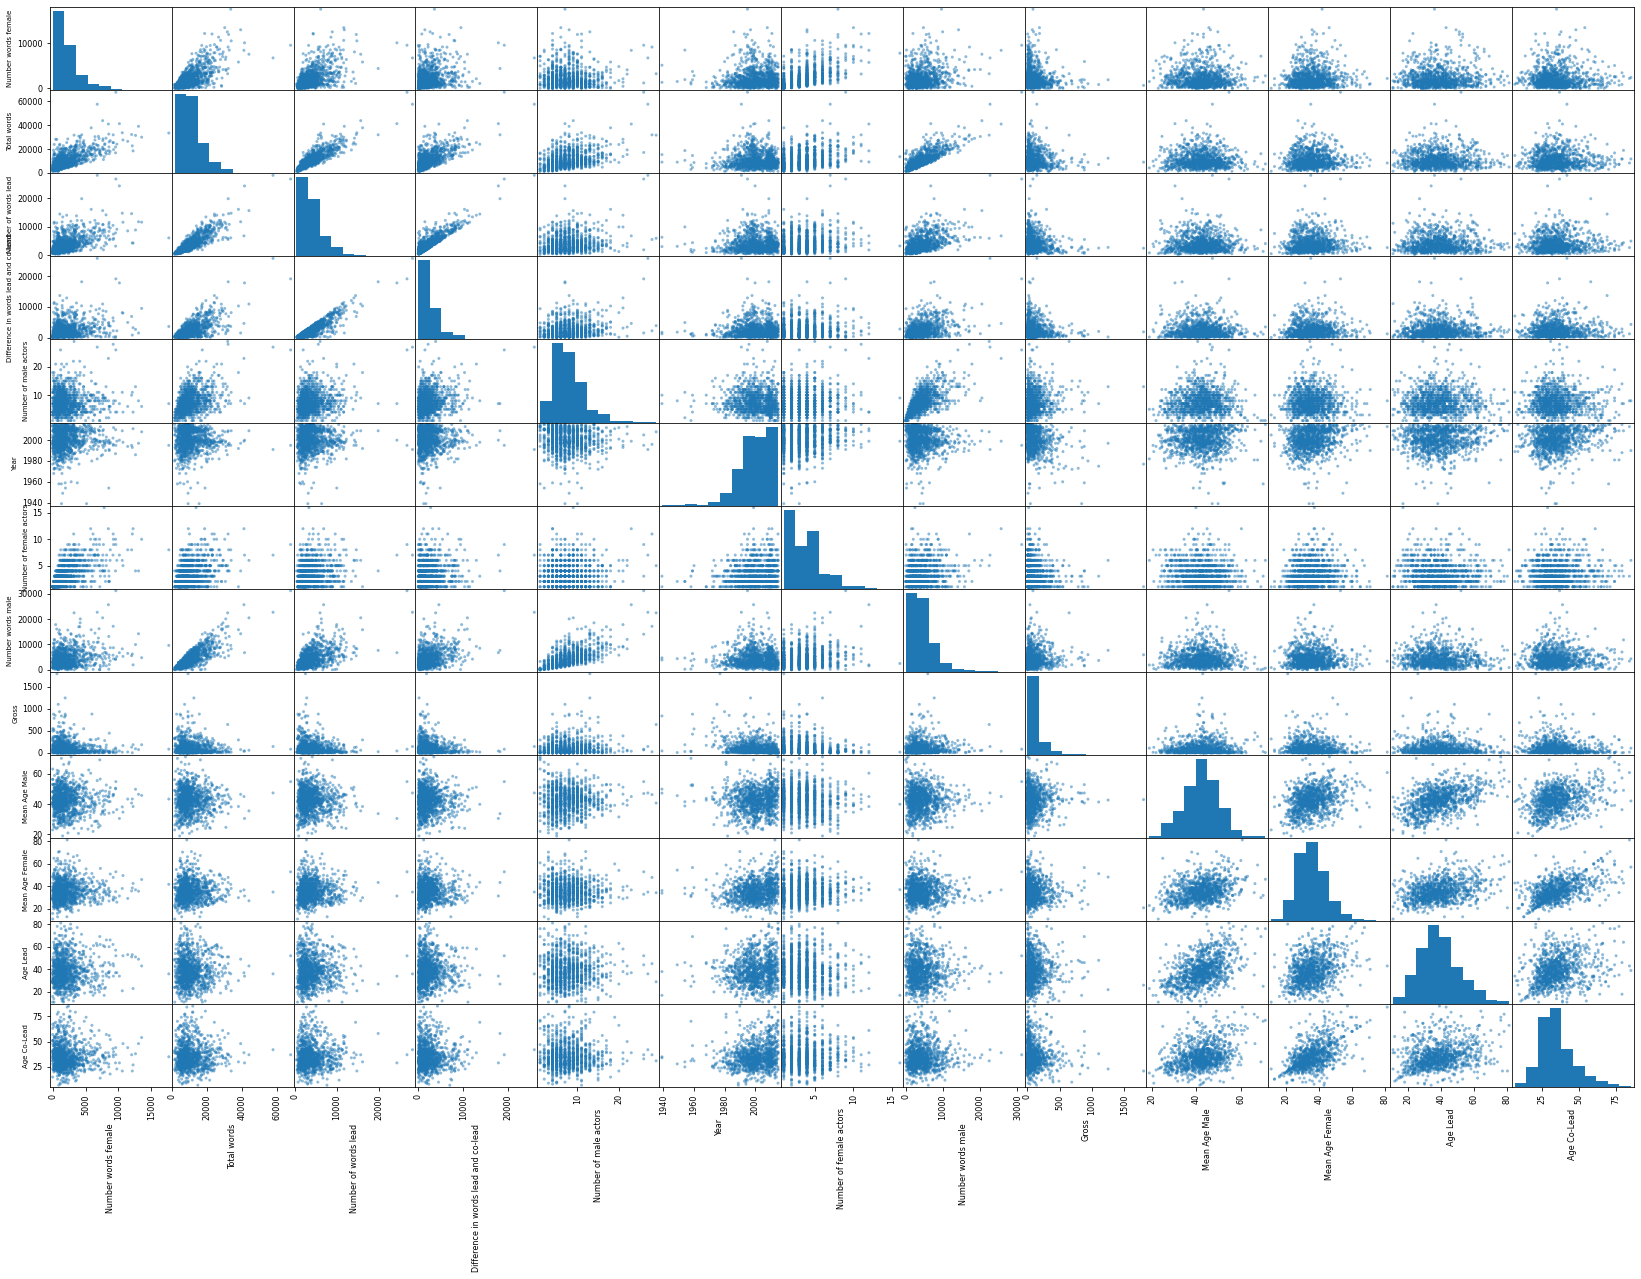

In [71]:
scatter_matrix_plot = pd.plotting.scatter_matrix(df.iloc[:, 1:14])
plt.subplots_adjust(left=0.8, right=3, bottom=0.5, top=3)
# Iterate over the subplots
for ax in scatter_matrix_plot.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=90)
    ax.set_ylabel(ax.get_ylabel(), fontsize=7, rotation=90)
plt.show()

### Splitting the data 80/20


In [72]:
np.random.seed(1)
trainI = np.random.choice(df.shape[0], size=int(df.shape[0] * 0.8), replace=False)
trainIndex = df.index.isin(trainI)
train = df.iloc[trainIndex]
test = df.iloc[~trainIndex]

# print(train.shape, test.shape)

### Logistic Regression


In [86]:
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score


model = skl_lm.LogisticRegression(solver="liblinear")


X_train = train[['Number words female', 'Number words male', 'Gross', 'Age Lead', 'Number of male actors', 'Number of female actors', 'Age Co-Lead', 'Difference in words lead and co-lead', 'Year', 'Mean Age Male', 'Mean Age Female']]
# print(X_train)
Y_train = train['Lead']
X_test = test[['Number words female', 'Number words male', 'Gross', 'Age Lead', 'Number of male actors', 'Number of female actors', 'Age Co-Lead', 'Difference in words lead and co-lead', 'Year', 'Mean Age Male', 'Mean Age Female']]
Y_test = test['Lead']

model.fit(X_train, Y_train)
# print("Model summary:")
# print(model)

predict_prob = model.predict_proba(X_test)
# print("The class order in the model:")
# print(model.classes_)
# print("Examples of predicted probalities for the above classes:")
# predict_prob[0:5] # The first 5 rows of the predict_prob array

prediction = np.empty(len(X_test), dtype=object)
print(predict_prob)
prediction = np.where(predict_prob[:, 0] >= 0.5, model.classes_[0], model.classes_[1])

conf_matrix = pd.crosstab(prediction, Y_test)
conf_matrix.reset_index(inplace=True)
conf_matrix = conf_matrix.drop(columns='row_0')
conf_matrix.index = ['Female', 'Male']
# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(Y_test, prediction)

# Calculate precision
precision = precision_score(Y_test, prediction, pos_label='Female')

# Calculate recall
recall = recall_score(Y_test, prediction, pos_label='Female')

# Calculate F1 score
f1 = f1_score(Y_test, prediction, pos_label='Female')

# Print the results

print("Confusion matrix:\n")
print(conf_matrix, "\n")

print(f"Accuracy: {np.mean(prediction == Y_test):.3f}")
print(f"Balanced accuracy: {balanced_accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")


[[0.05531263 0.94468737]
 [0.01313969 0.98686031]
 [0.63379266 0.36620734]
 [0.04376969 0.95623031]
 [0.28929182 0.71070818]
 [0.14213149 0.85786851]
 [0.31162291 0.68837709]
 [0.22111626 0.77888374]
 [0.19590145 0.80409855]
 [0.07292883 0.92707117]
 [0.03899134 0.96100866]
 [0.0374516  0.9625484 ]
 [0.04421741 0.95578259]
 [0.05620818 0.94379182]
 [0.16377392 0.83622608]
 [0.06910875 0.93089125]
 [0.36946512 0.63053488]
 [0.05266552 0.94733448]
 [0.18716378 0.81283622]
 [0.803298   0.196702  ]
 [0.71137559 0.28862441]
 [0.49677194 0.50322806]
 [0.25104736 0.74895264]
 [0.01999983 0.98000017]
 [0.10146892 0.89853108]
 [0.00188116 0.99811884]
 [0.0396992  0.9603008 ]
 [0.01034191 0.98965809]
 [0.29242889 0.70757111]
 [0.0390252  0.9609748 ]
 [0.72634188 0.27365812]
 [0.37710074 0.62289926]
 [0.03644209 0.96355791]
 [0.00499854 0.99500146]
 [0.61630861 0.38369139]
 [0.0251528  0.9748472 ]
 [0.30200754 0.69799246]
 [0.02803032 0.97196968]
 [0.02051938 0.97948062]
 [0.07685591 0.92314409]


### ROC for Logistic Regression

AUC: 0.8644087938205586


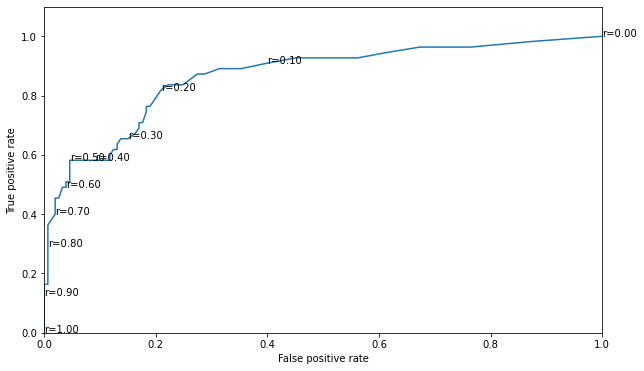

In [74]:
from sklearn.metrics import roc_auc_score

true_positive_rate = []
false_positive_rate = []

positive_class = "Female"
negative_class = "Male"

P = np.sum(Y_test == positive_class)
N = np.sum(Y_test == negative_class)

threshold = np.linspace(0, 1, 101)
model = skl_lm.LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)
predict_prob = model.predict_proba(X_test)
positive_class_index = np.argwhere(model.classes_ == positive_class).squeeze()

for r in threshold:
  prediction = np.where(predict_prob[:, positive_class_index] >= r, positive_class, negative_class)
  
  FP = np.sum((prediction == positive_class) & (Y_test == negative_class))
  TP = np.sum((prediction == positive_class) & (Y_test == positive_class))
  
  false_positive_rate.append(FP / N)
  true_positive_rate.append(TP / P)
  
plt.plot(false_positive_rate, true_positive_rate)
for idx in range(0, 101, 10):
  plt.text(false_positive_rate[idx], true_positive_rate[idx], f"r={threshold[idx]:.2f}")
  
plt.xlim([0,1])
plt.ylim([0,1.1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

# Calculate the AUC
auc = roc_auc_score((Y_test == positive_class).astype(int), predict_prob[:, positive_class_index])

# Print the AUC
print("AUC:", auc)


### K-fold Cross Validation


In [75]:
import numpy as np
import pandas as pd
from sklearn import linear_model as skl_lm
from sklearn.model_selection import KFold
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score

np.random.seed(1)
df = pd.read_csv("train.csv", na_values="?", dtype={"ID": str}).dropna().reset_index()

kf = KFold(n_splits=5, shuffle=True, random_state=1)

model = skl_lm.LogisticRegression(solver="liblinear")

# Initialize the metrics to store the results
conf_matrices = []
accuracies = []
balanced_accuracies = []
recall_scores = []
precision_scores = []
f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(df)):
  # print("TRAIN:", train_index, "TEST:", test_index)
  # Get the train and test data for the current fold
  train_data = df.iloc[train_index]
  test_data = df.iloc[test_index]
  # Split the data into X (predictors) and Y (target)
  X_train = train_data[['Number words female', 'Number words male', 'Gross', 'Age Lead', 'Number of male actors', 'Number of female actors', 'Age Co-Lead', 'Difference in words lead and co-lead', 'Year', 'Mean Age Male', 'Mean Age Female']]
  Y_train = train_data['Lead']
  X_test = test_data[['Number words female', 'Number words male', 'Gross', 'Age Lead', 'Number of male actors', 'Number of female actors', 'Age Co-Lead', 'Difference in words lead and co-lead', 'Year', 'Mean Age Male', 'Mean Age Female']]
  Y_test = test_data['Lead']
  # Fit the model on the training data for the current fold
  model.fit(X_train, Y_train)
  # Make predictions on the test data for the current fold
  predict_prob = model.predict_proba(X_test)
  prediction = np.where(predict_prob[:, 0] >= 0.5, model.classes_[0], model.classes_[1])
  # Calculate the confusion matrix for the current fold
  conf_matrix = pd.crosstab(prediction, Y_test)
  conf_matrix.reset_index(inplace=True)
  conf_matrix = conf_matrix.drop(columns='row_0')
  conf_matrix.index = ['Female', 'Male']

  conf_matrices.append(conf_matrix)
  accuracies.append(np.mean(prediction == Y_test))
  balanced_accuracies.append(balanced_accuracy_score(Y_test, prediction))
  precision_scores.append(precision_score(Y_test, prediction, pos_label="Female"))
  recall_scores.append(recall_score(Y_test, prediction, pos_label="Female"))
  f1_scores.append(f1_score(Y_test, prediction, pos_label="Female"))

  print(f"Fold {fold+1}:\n")

  print("Confusion matrix:\n")
  print(conf_matrix, "\n")
  print(f"Accuracy: {accuracies[-1]:.3f}")
  print(f"Balanced accuracy: {balanced_accuracies[-1]:.3f}")
  print(f"Precision: {precision_scores[-1]:.3f}")
  print(f"Recall: {recall_scores[-1]:.3f}")
  print(f"F1 score: {f1_scores[-1]:.3f}\n")

avg_conf_matrix = sum(conf_matrices) / len(conf_matrices)
avg_accuracy = sum(accuracies) / len(accuracies)
avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_f1_score = sum(f1_scores) / len(f1_scores)

print("Average confusion matrix:\n")
print(avg_conf_matrix, "\n")
print(f"Average accuracy: {avg_accuracy:.3f}")
print(f"Average balanced accuracy: {avg_balanced_accuracy:.3f}")
print(f"Average precision: {avg_precision:.3f}")
print(f"Average recall: {avg_recall:.3f}")
print(f"Average F1 score: {avg_f1_score:.3f}")



Fold 1:

Confusion matrix:

Lead    Female  Male
Female      28    13
Male        13   154 

Accuracy: 0.875
Balanced accuracy: 0.803
Precision: 0.683
Recall: 0.683
F1 score: 0.683

Fold 2:

Confusion matrix:

Lead    Female  Male
Female      30     6
Male        21   151 

Accuracy: 0.870
Balanced accuracy: 0.775
Precision: 0.833
Recall: 0.588
F1 score: 0.690

Fold 3:

Confusion matrix:

Lead    Female  Male
Female      33    11
Male        26   138 

Accuracy: 0.822
Balanced accuracy: 0.743
Precision: 0.750
Recall: 0.559
F1 score: 0.641

Fold 4:

Confusion matrix:

Lead    Female  Male
Female      27     5
Male        21   155 

Accuracy: 0.875
Balanced accuracy: 0.766
Precision: 0.844
Recall: 0.562
F1 score: 0.675

Fold 5:

Confusion matrix:

Lead    Female  Male
Female      31     7
Male        24   145 

Accuracy: 0.850
Balanced accuracy: 0.759
Precision: 0.816
Recall: 0.564
F1 score: 0.667

Average confusion matrix:

Lead    Female   Male
Female    29.8    8.4
Male      21.0  148

### ROC for K-fold cross validation

AUC: 0.8641148325358851


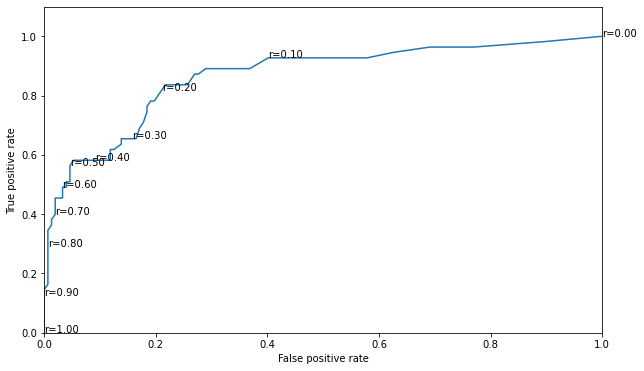

In [76]:
from sklearn.metrics import roc_auc_score

true_positive_rate = []
false_positive_rate = []

positive_class = "Female"
negative_class = "Male"

P = np.sum(Y_test == positive_class)
N = np.sum(Y_test == negative_class)

threshold = np.linspace(0, 1, 101)
model = skl_lm.LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)
predict_prob = model.predict_proba(X_test)
positive_class_index = np.argwhere(model.classes_ == positive_class).squeeze()

for r in threshold:
  prediction = np.where(predict_prob[:, positive_class_index] >= r, positive_class, negative_class)
  
  FP = np.sum((prediction == positive_class) & (Y_test == negative_class))
  TP = np.sum((prediction == positive_class) & (Y_test == positive_class))
  
  false_positive_rate.append(FP / N)
  true_positive_rate.append(TP / P)
  
plt.plot(false_positive_rate, true_positive_rate)
for idx in range(0, 101, 10):
  plt.text(false_positive_rate[idx], true_positive_rate[idx], f"r={threshold[idx]:.2f}")
  
plt.xlim([0,1])
plt.ylim([0,1.1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

# Calculate the AUC
auc = roc_auc_score((Y_test == positive_class).astype(int), predict_prob[:, positive_class_index])

# Print the AUC
print("AUC:", auc)


### Stratified K-fold Cross Validation

In [77]:
import numpy as np
import pandas as pd
from sklearn import linear_model as skl_lm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score

np.random.seed(1)
df = pd.read_csv("train.csv", na_values="?", dtype={"ID": str}).dropna().reset_index()

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

conf_matrices = []
accuracies = []
balanced_accuracies = []
recall_scores = []
precision_scores = []
f1_scores = []

model = skl_lm.LogisticRegression(solver="liblinear")

for fold, (train_index, test_index) in enumerate(kf.split(df, df["Lead"])):
    train = df.iloc[train_index]
    test = df.iloc[test_index]

    X_train = train.drop(columns=["Lead"])
    Y_train = train['Lead']
    X_test = test.drop(columns=["Lead"])
    Y_test = test['Lead']

    model.fit(X_train, Y_train)

    predict_prob = model.predict_proba(X_test)

    prediction = np.empty(len(X_test), dtype=object)
    prediction = np.where(predict_prob[:, 0] >= 0.5, model.classes_[0], model.classes_[1])

    conf_matrix = pd.crosstab(prediction, Y_test)
    conf_matrix.reset_index(inplace=True)
    conf_matrix = conf_matrix.drop(columns='row_0')
    conf_matrix.index = ['Female', 'Male']

    conf_matrices.append(conf_matrix)
    accuracies.append(np.mean(prediction == Y_test))
    balanced_accuracies.append(balanced_accuracy_score(Y_test, prediction))
    precision_scores.append(precision_score(Y_test, prediction, pos_label="Female"))
    recall_scores.append(recall_score(Y_test, prediction, pos_label="Female"))
    f1_scores.append(f1_score(Y_test, prediction, pos_label="Female"))

    print(f"Fold {fold+1}:\n")

    print("Confusion matrix:\n")
    print(conf_matrix, "\n")
    print(f"Accuracy: {accuracies[-1]:.3f}")
    print(f"Balanced accuracy: {balanced_accuracies[-1]:.3f}")
    print(f"Precision: {precision_scores[-1]:.3f}")
    print(f"Recall: {recall_scores[-1]:.3f}")
    print(f"F1 score: {f1_scores[-1]:.3f}\n")


avg_conf_matrix = sum(conf_matrices) / len(conf_matrices)
avg_accuracy = sum(accuracies) / len(accuracies)
avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_f1_score = sum(f1_scores) / len(f1_scores)

print("Average confusion matrix:\n")
print(avg_conf_matrix, "\n")
print(f"Average accuracy: {avg_accuracy:.3f}")
print(f"Average balanced accuracy: {avg_balanced_accuracy:.3f}")
print(f"Average precision: {avg_precision:.3f}")
print(f"Average recall: {avg_recall:.3f}")
print(f"Average F1 score: {avg_f1_score:.3f}")

from sklearn.model_selection import cross_val_score, StratifiedKFold

# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
metrics = ["accuracy", "balanced_accuracy"]
df2 = pd.read_csv("train.csv")
X_2 = df2.drop(columns=["Lead"])
y_2 = df2["Lead"]

for metric in metrics:
  scores = cross_val_score(model, X_2, y_2, cv=kf, scoring=metric)
  print("This is score:")
  print(scores)
  print("\nThis is the mean score:")
  print(np.mean(scores))


Fold 1:

Confusion matrix:

Lead    Female  Male
Female      17     4
Male         9    74 

Accuracy: 0.875
Balanced accuracy: 0.801
Precision: 0.810
Recall: 0.654
F1 score: 0.723

Fold 2:

Confusion matrix:

Lead    Female  Male
Female      17     4
Male         9    74 

Accuracy: 0.875
Balanced accuracy: 0.801
Precision: 0.810
Recall: 0.654
F1 score: 0.723

Fold 3:

Confusion matrix:

Lead    Female  Male
Female      17     2
Male         9    76 

Accuracy: 0.894
Balanced accuracy: 0.814
Precision: 0.895
Recall: 0.654
F1 score: 0.756

Fold 4:

Confusion matrix:

Lead    Female  Male
Female      13     3
Male        13    75 

Accuracy: 0.846
Balanced accuracy: 0.731
Precision: 0.812
Recall: 0.500
F1 score: 0.619

Fold 5:

Confusion matrix:

Lead    Female  Male
Female      15     5
Male        10    74 

Accuracy: 0.856
Balanced accuracy: 0.768
Precision: 0.750
Recall: 0.600
F1 score: 0.667

Fold 6:

Confusion matrix:

Lead    Female  Male
Female      14     4
Male        11    75

### ROC for Stratified K-fold cross validation

AUC: 0.902051282051282


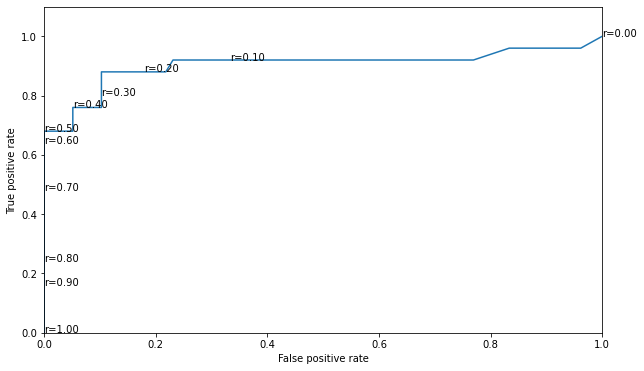

In [78]:
from sklearn.metrics import roc_auc_score

true_positive_rate = []
false_positive_rate = []

positive_class = "Female"
negative_class = "Male"

P = np.sum(Y_test == positive_class)
N = np.sum(Y_test == negative_class)

threshold = np.linspace(0, 1, 101)
model = skl_lm.LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)
predict_prob = model.predict_proba(X_test)
positive_class_index = np.argwhere(model.classes_ == positive_class).squeeze()

for r in threshold:
  prediction = np.where(predict_prob[:, positive_class_index] >= r, positive_class, negative_class)
  
  FP = np.sum((prediction == positive_class) & (Y_test == negative_class))
  TP = np.sum((prediction == positive_class) & (Y_test == positive_class))
  
  false_positive_rate.append(FP / N)
  true_positive_rate.append(TP / P)
  
plt.plot(false_positive_rate, true_positive_rate)
for idx in range(0, 101, 10):
  plt.text(false_positive_rate[idx], true_positive_rate[idx], f"r={threshold[idx]:.2f}")
  
plt.xlim([0,1])
plt.ylim([0,1.1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

# Calculate the AUC
auc = roc_auc_score((Y_test == positive_class).astype(int), predict_prob[:, positive_class_index])

# Print the AUC
print("AUC:", auc)


### Group K-fold Cross Validation

In [79]:
import numpy as np
import pandas as pd
from sklearn import linear_model as skl_lm
from sklearn.model_selection import GroupKFold
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score

np.random.seed(1)
df = pd.read_csv("train.csv", na_values="?", dtype={"ID": str}).dropna().reset_index()
df["ID"] = range(len(df))

group_kf = GroupKFold(n_splits=5)

model = skl_lm.LogisticRegression(solver="liblinear")

conf_matrices = []
accuracies = []
balanced_accuracies = []
recall_scores = []
precision_scores = []
f1_scores = []

for fold, (train_index, test_index) in enumerate(group_kf.split(df, groups=df['ID'])):
    train = df.iloc[train_index]
    test = df.iloc[test_index]

    X_train = train[['Number words female', 'Number words male', 'Gross', 'Age Lead', 'Number of male actors', 'Number of female actors', 'Age Co-Lead', 'Difference in words lead and co-lead', 'Year', 'Mean Age Male', 'Mean Age Female']]
    Y_train = train['Lead']
    X_test = test[['Number words female', 'Number words male', 'Gross', 'Age Lead', 'Number of male actors', 'Number of female actors', 'Age Co-Lead', 'Difference in words lead and co-lead', 'Year', 'Mean Age Male', 'Mean Age Female']]
    Y_test = test['Lead']

    model.fit(X_train, Y_train)

    predict_prob = model.predict_proba(X_test)

    prediction = np.empty(len(X_test), dtype=object)
    prediction = np.where(predict_prob[:, 0] >= 0.5, model.classes_[0], model.classes_[1])

    conf_matrix = pd.crosstab(prediction, Y_test)
    conf_matrix.reset_index(inplace=True)
    conf_matrix = conf_matrix.drop(columns='row_0')
    conf_matrix.index = ['Female', 'Male']

    conf_matrices.append(conf_matrix)
    accuracies.append(np.mean(prediction == Y_test))
    balanced_accuracies.append(balanced_accuracy_score(Y_test, prediction))
    precision_scores.append(precision_score(Y_test, prediction, pos_label="Female"))
    recall_scores.append(recall_score(Y_test, prediction, pos_label="Female"))
    f1_scores.append(f1_score(Y_test, prediction, pos_label="Female"))

    print(f"Fold {fold+1}:\n")

    print("Confusion matrix:\n")
    print(conf_matrix, "\n")
    print(f"Accuracy: {accuracies[-1]:.3f}")
    print(f"Balanced accuracy: {balanced_accuracies[-1]:.3f}")
    print(f"Precision: {precision_scores[-1]:.3f}")
    print(f"Recall: {recall_scores[-1]:.3f}")
    print(f"F1 score: {f1_scores[-1]:.3f}\n")

avg_conf_matrix = sum(conf_matrices) / len(conf_matrices)
avg_accuracy = sum(accuracies) / len(accuracies)
avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_f1_score = sum(f1_scores) / len(f1_scores)



print("Average confusion matrix:\n")
print(avg_conf_matrix, "\n")
print(f"Average accuracy: {avg_accuracy:.3f}")
print(f"Average balanced accuracy: {avg_balanced_accuracy:.3f}")
print(f"Average precision: {avg_precision:.3f}")
print(f"Average recall: {avg_recall:.3f}")
print(f"Average F1 score: {avg_f1_score:.3f}")



Fold 1:

Confusion matrix:

Lead    Female  Male
Female      23     8
Male        23   154 

Accuracy: 0.851
Balanced accuracy: 0.725
Precision: 0.742
Recall: 0.500
F1 score: 0.597

Fold 2:

Confusion matrix:

Lead    Female  Male
Female      44     5
Male        14   145 

Accuracy: 0.909
Balanced accuracy: 0.863
Precision: 0.898
Recall: 0.759
F1 score: 0.822

Fold 3:

Confusion matrix:

Lead    Female  Male
Female      27     8
Male        27   146 

Accuracy: 0.832
Balanced accuracy: 0.724
Precision: 0.771
Recall: 0.500
F1 score: 0.607

Fold 4:

Confusion matrix:

Lead    Female  Male
Female      32     8
Male        26   142 

Accuracy: 0.837
Balanced accuracy: 0.749
Precision: 0.800
Recall: 0.552
F1 score: 0.653

Fold 5:

Confusion matrix:

Lead    Female  Male
Female      19     9
Male        19   160 

Accuracy: 0.865
Balanced accuracy: 0.723
Precision: 0.679
Recall: 0.500
F1 score: 0.576

Average confusion matrix:

Lead    Female   Male
Female    29.0    7.6
Male      21.8  149

### ROC for Group K-fold cross validation

AUC: 0.8805668016194332


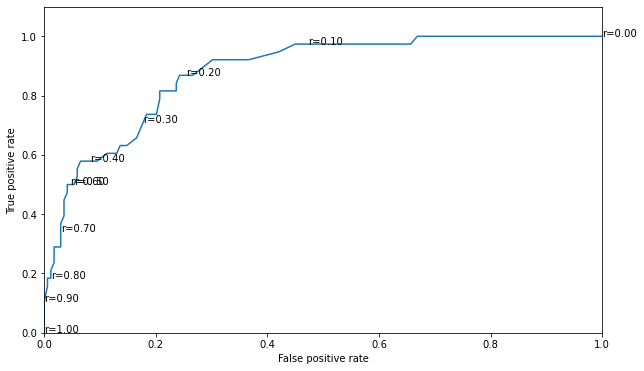

In [80]:
from sklearn.metrics import roc_auc_score

true_positive_rate = []
false_positive_rate = []

positive_class = "Female"
negative_class = "Male"

P = np.sum(Y_test == positive_class)
N = np.sum(Y_test == negative_class)

threshold = np.linspace(0, 1, 101)
model = skl_lm.LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)
predict_prob = model.predict_proba(X_test)
positive_class_index = np.argwhere(model.classes_ == positive_class).squeeze()

for r in threshold:
  prediction = np.where(predict_prob[:, positive_class_index] >= r, positive_class, negative_class)
  
  FP = np.sum((prediction == positive_class) & (Y_test == negative_class))
  TP = np.sum((prediction == positive_class) & (Y_test == positive_class))
  
  false_positive_rate.append(FP / N)
  true_positive_rate.append(TP / P)
  
plt.plot(false_positive_rate, true_positive_rate)
for idx in range(0, 101, 10):
  plt.text(false_positive_rate[idx], true_positive_rate[idx], f"r={threshold[idx]:.2f}")
  
plt.xlim([0,1])
plt.ylim([0,1.1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

# Calculate the AUC
auc = roc_auc_score((Y_test == positive_class).astype(int), predict_prob[:, positive_class_index])

# Print the AUC
print("AUC:", auc)


### Stratified K-fold Cross Validation with Grid search for hyperparameter tuning

In [81]:
import numpy as np
import pandas as pd
from sklearn import linear_model as skl_lm
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

np.random.seed(1)

# Load the data from a CSV file
df = pd.read_csv("train.csv")

# Create a Stratified K-Fold object with 10 folds
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Create a logistic regression model
model = skl_lm.LogisticRegression(solver="liblinear")

# Define the range of values for the C parameter to be searched
param_grid = {"C": [0.001, .009, 0.01, .09, 1, 5, 10, 25], "penalty": ["l1", "l2"]}

# Define the grid search with 10-fold cross validation and the defined parameter grid
grid_search = GridSearchCV(model, param_grid, cv=skf, scoring="balanced_accuracy")

X = df.drop(columns=["Lead"])
y = df["Lead"]

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameter and score found by the grid search
print("Best parameter found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Use the best estimator found by the grid searchs
best_model = grid_search.best_estimator_

conf_matrices = []

# Loop through each fold of the Stratified K-Fold object
for fold, (train_index, test_index) in enumerate(skf.split(df, df["Lead"])):
    # Split the data into training and testing sets for the current fold
    train = df.iloc[train_index]
    test = df.iloc[test_index]

    X_train = train.drop(columns=["Lead"])
    Y_train = train["Lead"]
    X_test = test.drop(columns=["Lead"])
    Y_test = test["Lead"]

    best_model.fit(X_train, Y_train)

    # Generate predicted probabilities 
    predict_prob = best_model.predict_proba(X_test)
    prediction = np.empty(len(X_test), dtype=object)
    prediction = np.where(predict_prob[:, 0] >= 0.5, best_model.classes_[0], best_model.classes_[1])

    # Generate a confusion matrix
    conf_matrix = pd.crosstab(prediction, Y_test)
    conf_matrix.reset_index(inplace=True)
    conf_matrix = conf_matrix.drop(columns="row_0")
    conf_matrix.index = ["Female", "Male"]

    conf_matrices.append(conf_matrix)


avg_conf_matrix = sum(conf_matrices) / len(conf_matrices)


# Print the average confusion matrix
print("Average confusion matrix:")
print(avg_conf_matrix, "\n")

# Define a list of metrics to calculate
metrics = ["accuracy", "balanced_accuracy"]

X = df.drop(columns=["Lead"])
y = df["Lead"]

# Loop through each metric and calculate the average score across all folds
for metric in metrics:
  scores = cross_val_score(best_model, X, y, cv=skf, scoring=metric)
  mean_score = np.mean(scores)
  print(f"Average {metric}: {mean_score:.3f}")



Best parameter found:  {'C': 1, 'penalty': 'l1'}
Best score found:  0.7933592989289193
Average confusion matrix:
Lead    Female  Male
Female    16.0   3.4
Male       9.4  75.1 

Average accuracy: 0.877
Average balanced_accuracy: 0.793


In [82]:
# Load the test data from a CSV file
test_df = pd.read_csv("test.csv")

# Drop the "Lead" column from the test data
X_test = test_df.drop(columns=["Lead"])

# Generate predictions for the test data using the best model
predictions = best_model.predict(X_test)

# Save the predictions to a new Pandas DataFrame
predictions_df = pd.DataFrame(predictions, columns=["Lead_prediction"])

# print(predictions_df)

AUC: 0.9025641025641026


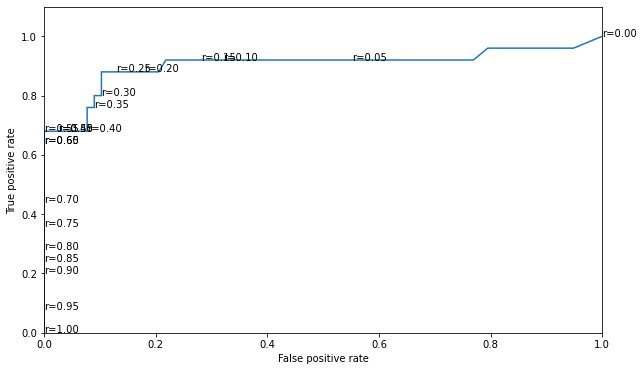

In [83]:
from sklearn.metrics import roc_auc_score

true_positive_rate = []
false_positive_rate = []

positive_class = "Female"
negative_class = "Male"

P = np.sum(Y_test == positive_class)
N = np.sum(Y_test == negative_class)

threshold = np.linspace(0, 1, 101)
model = skl_lm.LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)
predict_prob = model.predict_proba(X_test)
positive_class_index = np.argwhere(model.classes_ == positive_class).squeeze()

for r in threshold:
  prediction = np.where(predict_prob[:, positive_class_index] >= r, positive_class, negative_class)
  
  FP = np.sum((prediction == positive_class) & (Y_test == negative_class))
  TP = np.sum((prediction == positive_class) & (Y_test == positive_class))
  
  false_positive_rate.append(FP / N)
  true_positive_rate.append(TP / P)
  
plt.plot(false_positive_rate, true_positive_rate)
for idx in range(0, 101, 5):
  plt.text(false_positive_rate[idx], true_positive_rate[idx], f"r={threshold[idx]:.2f}")
  
plt.xlim([0,1])
plt.ylim([0,1.1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

# Calculate the AUC
auc = roc_auc_score((Y_test == positive_class).astype(int), predict_prob[:, positive_class_index])

# Print the AUC
print("AUC:", auc)

### Using optimal r each fold

In [85]:
import numpy as np
import pandas as pd
from sklearn import linear_model as skl_lm
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_curve, auc

np.random.seed(1)

# Load the data from a CSV file
df = pd.read_csv("train.csv")

# Create a Stratified K-Fold object with 10 folds
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Create a logistic regression model
model = skl_lm.LogisticRegression(solver="liblinear")

# Define the range of values for the C parameter to be searched
param_grid = {"C": [0.001, .009, 0.01, .09, 1, 5, 10, 25], "penalty": ["l1", "l2"]}

# Define the grid search with 10-fold cross validation and the defined parameter grid
grid_search = GridSearchCV(model, param_grid, cv=skf, scoring="balanced_accuracy")

X = df.drop(columns=["Lead"])
y = df["Lead"]

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameter and score found by the grid search
print("Best parameter found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Use the best estimator found by the grid searchs
best_model = grid_search.best_estimator_

conf_matrices = []
accuracies = []
balanced_accuracies = []
f1_scores = []
fpr = []
tpr = []
roc_auc = []


# Loop through each fold of the Stratified K-Fold object
for fold, (train_index, test_index) in enumerate(skf.split(df, df["Lead"])):
    # Split the data into training and testing sets for the current fold
    train = df.iloc[train_index]
    test = df.iloc[test_index]

    X_train = train.drop(columns=["Lead"])
    Y_train = train["Lead"]
    X_test = test.drop(columns=["Lead"])
    Y_test = test["Lead"]

    best_model.fit(X_train, Y_train)


    predict_prob = best_model.predict_proba(X_test)
    # Create an array of thresholds to search through
    thresholds = np.arange(0.1, 1.0, 0.001)
    f1_scores = []
    # Loop through each threshold and calculate the F1 score
    for threshold in thresholds:
        prediction = np.where(predict_prob[:, 0] >= threshold, best_model.classes_[0], best_model.classes_[1])
        f1_scores.append(f1_score(Y_test, prediction, pos_label=best_model.classes_[0]))
    # Find the index of the threshold with the highest F1 score
    best_threshold_index = np.argmax(f1_scores)
    # Use the threshold with the highest F1 score to generate the final predictions
    prediction = np.where(predict_prob[:, 0] >= thresholds[best_threshold_index], best_model.classes_[0], best_model.classes_[1])
    
    fpr_, tpr_, thresholds = roc_curve(Y_test, predict_prob[:, 0], pos_label=best_model.classes_[0])
    fpr.append(fpr_)
    tpr.append(tpr_)
    roc_auc.append(auc(fpr_, tpr_))
    
    # print(f'Optimal threshold: {thresholds[best_threshold_index]:.3f}')
    # print('Accuracy:', np.mean(prediction == Y_test))
    # print(f'Balanced accuracy: {balanced_accuracy_score(Y_test, prediction):.3f}')

    # Generate a confusion matrix
    conf_matrix = pd.crosstab(prediction, Y_test)
    conf_matrix.reset_index(inplace=True)
    conf_matrix = conf_matrix.drop(columns="row_0")
    conf_matrix.index = ["Female", "Male"]

    conf_matrices.append(conf_matrix)
    accuracies.append(np.mean(prediction == Y_test))
    balanced_accuracies.append(balanced_accuracy_score(Y_test, prediction))

avg_conf_matrix = sum(conf_matrices) / len(conf_matrices)
avg_accuracy = sum(accuracies) / len(accuracies)
avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)

# Print the average confusion matrix
print("Average confusion matrix:")
print(avg_conf_matrix, "\n")
print(f"Average accuracy: {avg_accuracy:.3f}")
print(f"Average balanced accuracy: {avg_balanced_accuracy:.3f}")



mean_fpr = np.mean(fpr, axis=0)
mean_tpr = np.mean(tpr, axis=0)
mean_fpr = np.insert(mean_fpr, 0, 0)
mean_tpr = np.insert(mean_tpr, 0, 0)
# print(mean_fpr)
mean_roc_auc = auc(mean_fpr, mean_tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC (AUC = %0.2f)' % mean_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Best parameter found:  {'C': 1, 'penalty': 'l1'}
Best score found:  0.7933592989289193
Average confusion matrix:
Lead    Female  Male
Female    17.9   5.5
Male       7.5  73.0 

Average accuracy: 0.875
Average balanced accuracy: 0.817


c:\Users\Dena Azarang\anaconda3\lib\site-packages\numpy\core\_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


ValueError: operands could not be broadcast together with shapes (30,) (22,) 